In [0]:
# Importamos las librerías
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Feedback de tus modelos

> Ciertos modelos como la regresión o los arboles se dicen **"interpretables"**. Esto quiere decir que de los resultados de los modelos podemos sacar conclusiones o **"insights"**.


En particular la regresión Lasso es interpretable:

- Mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.
- La regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [0]:
X = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/machine_learning_python/intermediate_results/X.csv')

y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [0]:
from sklearn.linear_model import Lasso
model = Lasso()

In [0]:
# Separamos los datos de entrenamiento y de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
# Verificamos el porcentaje de los datos de entrenamiento
len(X_train)/len(X)

0.75

In [7]:
# Entrenamos con la regresión Lasso
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
# Evaluamos el modelo
model.score(X_test, y_test)

0.8501786251038601

In [9]:
# Los atributos de los estimadores en ScikitLearn siempre van al final con un underscore
model.coef_

# Estos son los parámetros por los que se multiplicarán cada feature, tienen el mismo largo que la cantidad de features

array([ 1.07383740e+00,  8.68331068e+05, -6.12422399e+06,  2.94528913e+04,
       -1.76866771e+02,  3.18706134e-04,  7.25396628e+06,  1.90529339e+00])

In [0]:
var = np.floor(np.log10(np.abs(model.coef_)))

([<matplotlib.axis.XTick at 0x7fc7a8830b38>,
 [Text(0, 0, 'production_budget'),
  Text(0, 0, 'title_year'),
  Text(0, 0, 'aspect_ratio'),
  Text(0, 0, 'duration'),
  Text(0, 0, 'cast_total_facebook_likes'),
  Text(0, 0, 'budget'),
  Text(0, 0, 'imdb_score')])

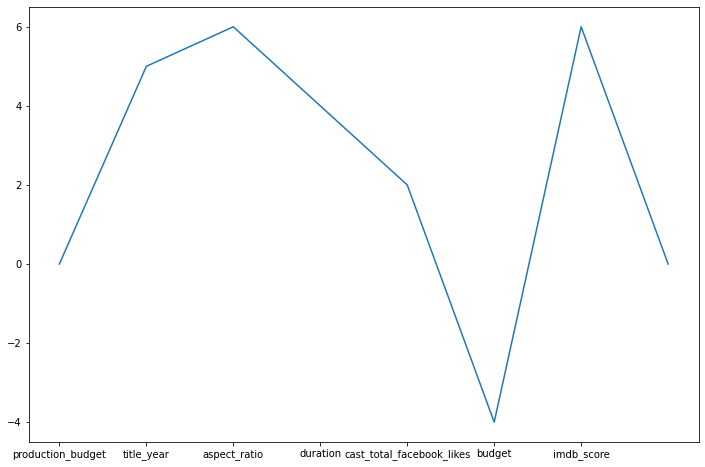

In [11]:
plt.rcParams["figure.figsize"] = [12, 8]
plt.plot(var)
plt.xticks(np.arange(7), list(X.columns))


Esto nos guía a guardar únicamente:

- production_budget
- title_year
- duration
- cast_total_facebook_likes
- imdb_score

# Correlación entre variables

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


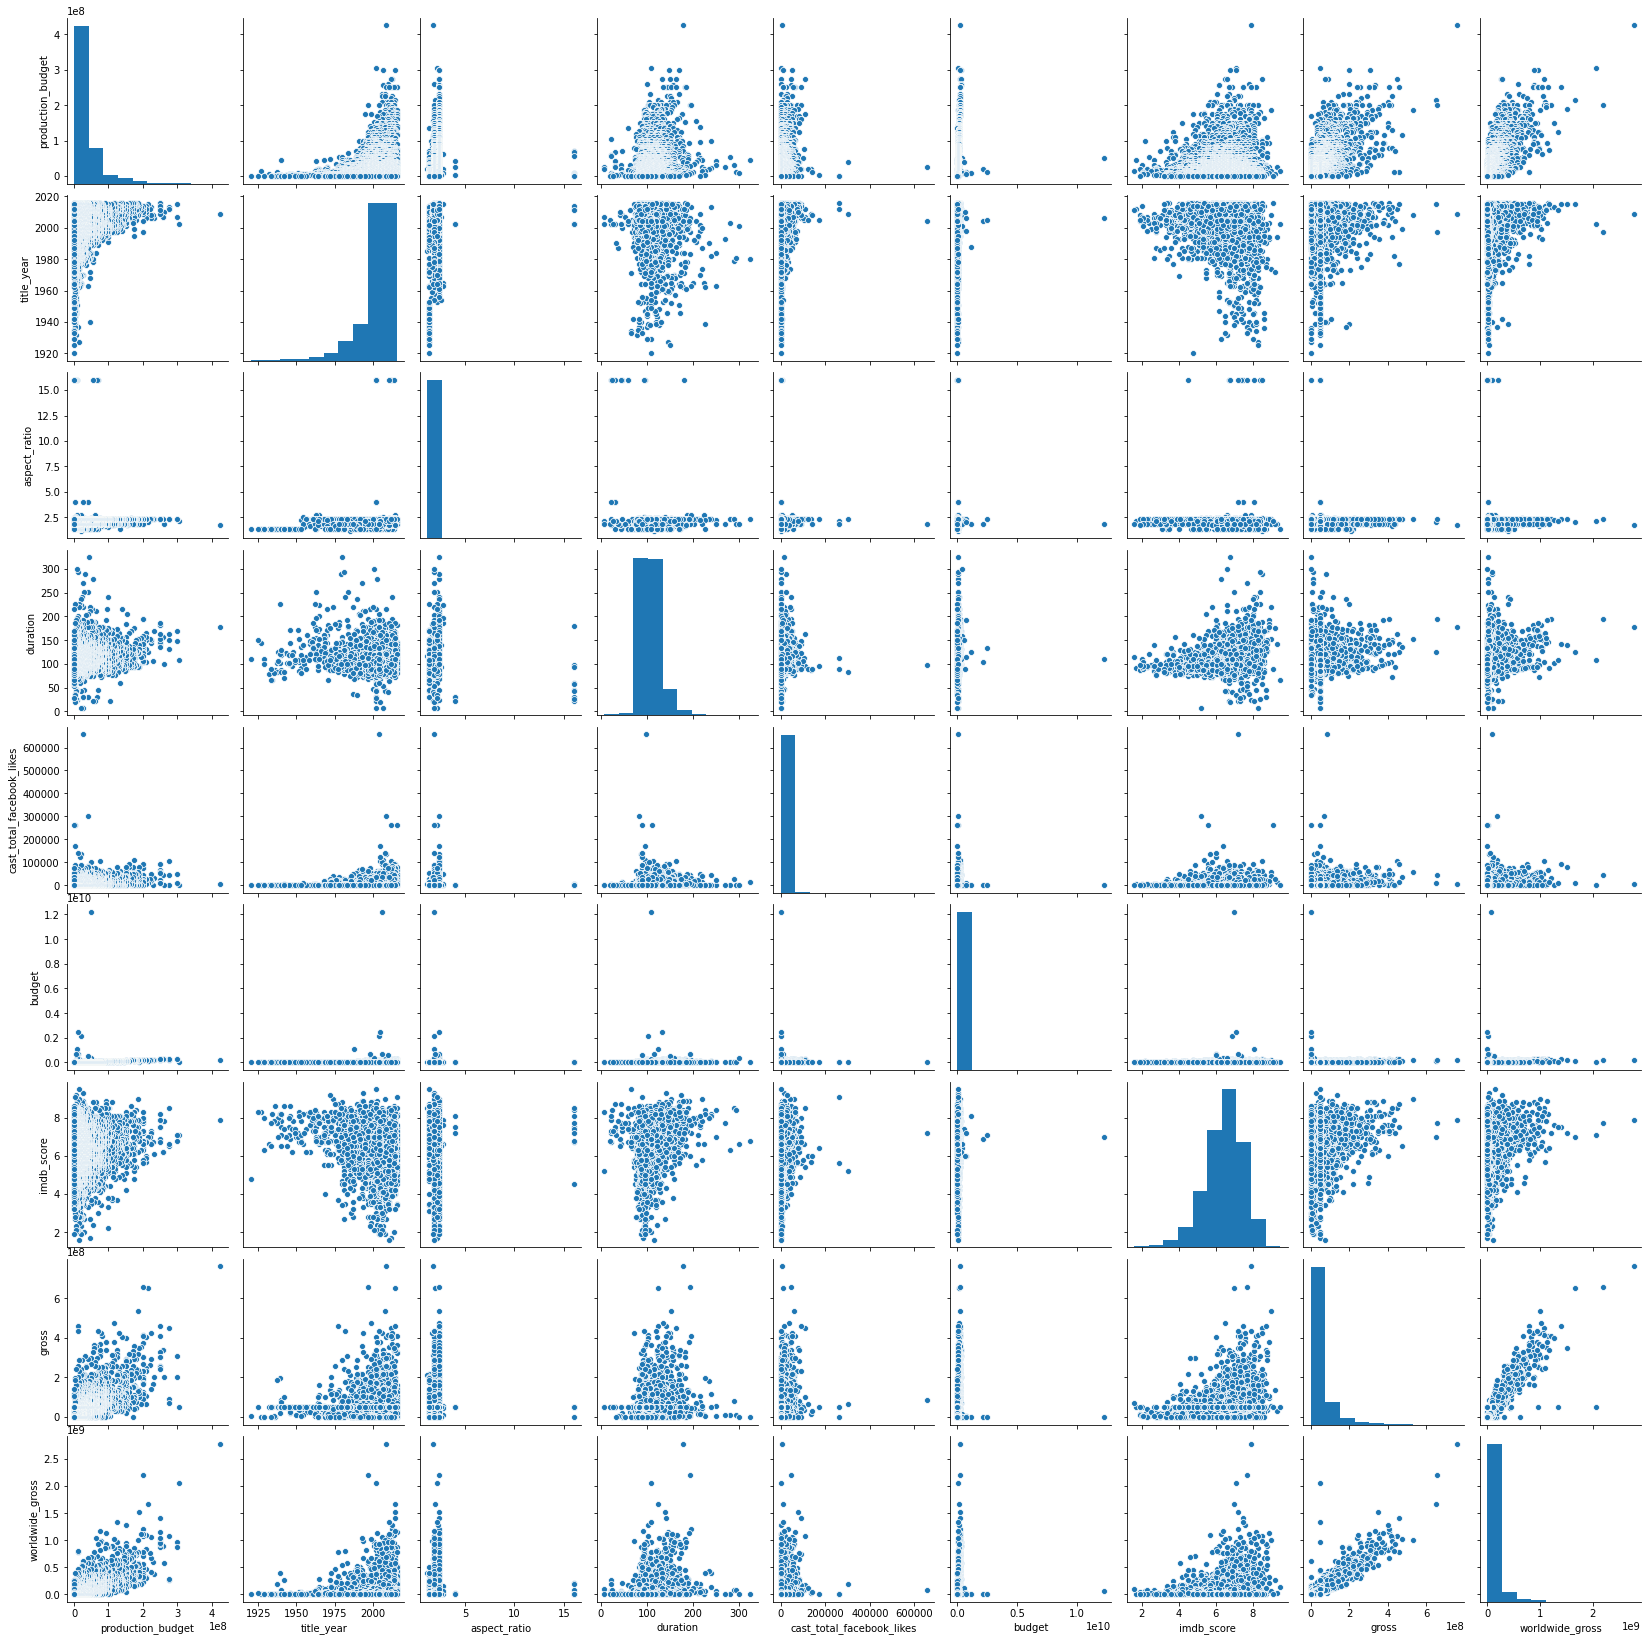

In [12]:
import seaborn as sns

Z = pd.concat([X,y], axis=1)
sns.pairplot(Z)

- En la diagonal nos grafica cómo se distribuye la variable
- Los scatterflows nos grafica la correlación entre las variables

In [0]:
# Colocamos los valores en contenedores, en 8 partes (Clases)
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
Z2 = pd.concat([X,clase],axis=1)

# La clase nos indica que tan costosa fué la película, entre más alta, ñas costosa

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

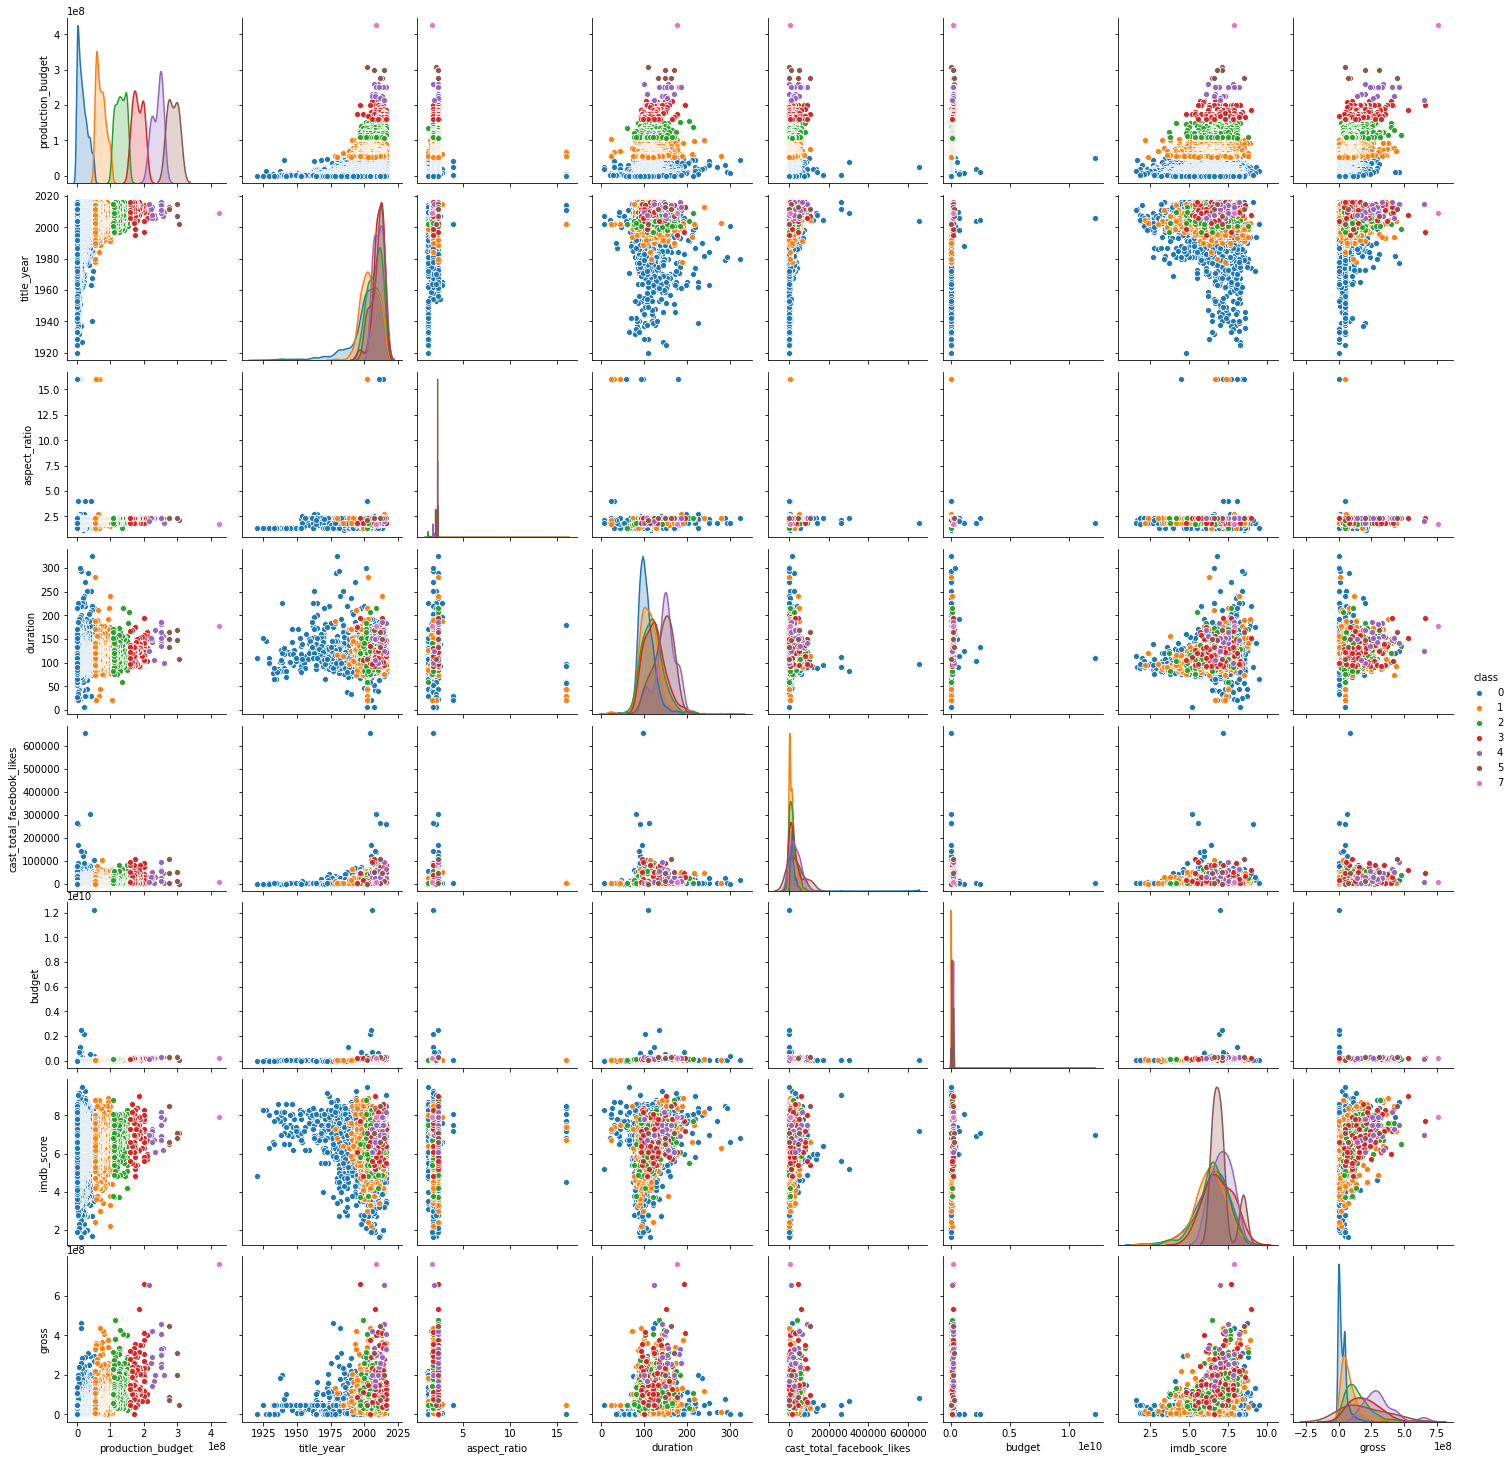

In [14]:
sns.pairplot(Z2,hue='class')

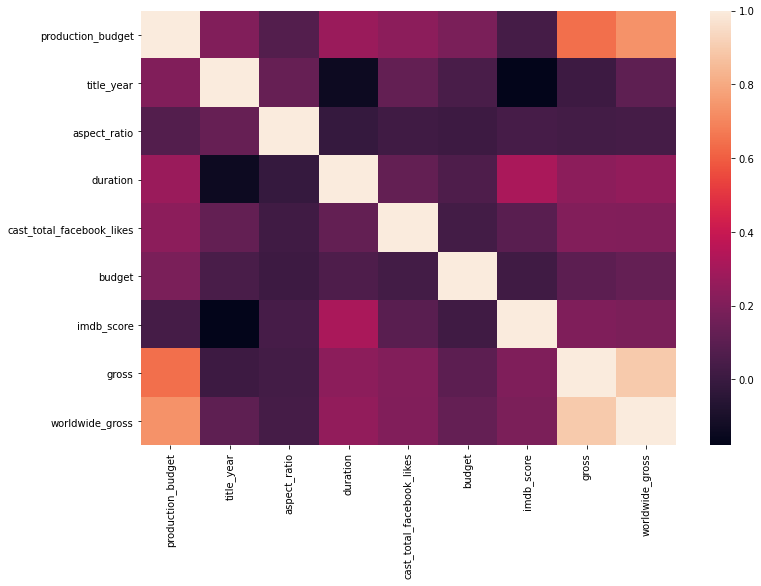

In [15]:
Z3 = pd.concat([X, y], axis=1)
sns.heatmap(Z3.corr())


De esto concluimos, sin sorpresa, que son muy importantes:

- production_budget
- imdb_score

# Métodos de selección automática de features

> Sklearn posee una serie de métodos para seleccionar las mejores features. Estos métodos los puedes encontrar en sklearn.feature_selection

In [16]:
# Importamos la librería que obtiene la selección de la mejor feature
from sklearn.feature_selection  import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression,k=4)
selector.fit(X,y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7fc7a05899d8>)

([<matplotlib.axis.XTick at 0x7fc79fb245f8>,
 [Text(0, 0, 'production_budget'),
  Text(0, 0, 'title_year'),
  Text(0, 0, 'aspect_ratio'),
  Text(0, 0, 'duration'),
  Text(0, 0, 'cast_total_facebook_likes'),
  Text(0, 0, 'budget'),
  Text(0, 0, 'imdb_score'),
  Text(0, 0, 'gross')])

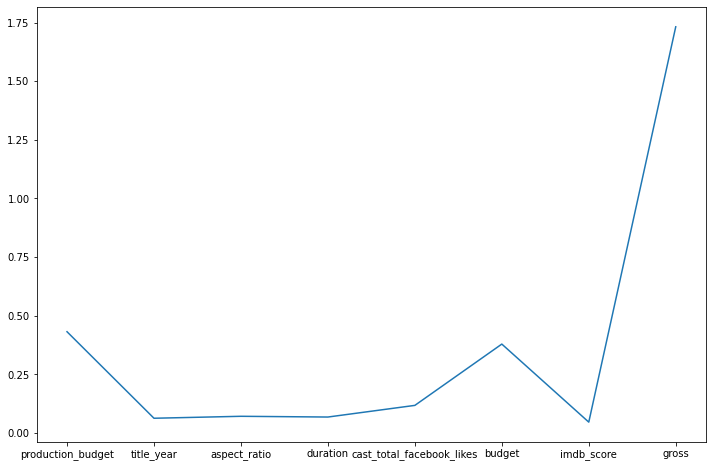

In [20]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(8), list(X.columns))


Del analisis univariante obtenemos que las mejores features son:

- production_budget
- cast_total_facebook_likes
- budget


**Guardaremos las 5 features entregadas por la interpretación de nuestra regresión Lasso**

In [0]:
X2 = X[['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

# Veamos los resultados del modelo con estas features

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
cols2 = ['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [26]:
# Regresión instanciando 3 modelos Lasso
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

# Se entrenan los modelos con las diferentes features
model1.fit(X_train, y_train)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
# Se prueban los modelos
print(model1.score(X_test, y_test))
print(model2.score(X2_test, y2_test))
print(model3.score(X3_test, y3_test))

0.875066927133173
0.5248676581469285
0.5247037429165915
